In [2]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<b>Задача 1. Чтение данных</b>  
Прочитайте данные из файла spam.csv, используя средства модуля pandas. В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежать в первом классе, а остальные - в нулевом. Во второй колонке - текст сообщения. 

Disclaimer: в последующих задачах вплоть до 6 задачи я создавал новый датафрейм, чтобы каждый раз работать с "чистым" и не менять старый, надеюсь, это не сильно противоречит условию задачи; собственно умение обновлять старый датафрейм я показываю в задаче №6, где я уже переписываю старый датафрейм, а не создаю новый.

In [3]:
#Читаем табличку
df = pd.read_csv('spam.csv', encoding = 'cp1251')
#Создаём список, в который загружаем все значения классов, чтобы затем заменить их на числовое значение.
lsthamspam = []
for i in df['v1']:
    lsthamspam.append(i)
new_classes = []
for pp in lsthamspam:
    if pp == 'ham':
        pp = '0'
    if pp == 'spam':
        pp = '1'
    new_classes.append(pp)
text = df['v2']
#Создадим новый датасет и новую очищенную от лишних столбцов табличку, чтобы работать с ней
DataSet = list(zip(text, new_classes))
newdf = pd.DataFrame(data = DataSet, columns=['text', 'class'])
newdf[:10]

,text,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


<b>Задача 2. Предобработка</b>  
Переведите все буквы в нижний регистр.
С помощью регулярных выражений почистите текст, оставляя только слова (удалите знаки препинания, а также все числа можно заменить на N и т.п.).
Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов.
Преобразуйте таблицу с данными, так чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [4]:
def normalize(text):
    lst1 = []
    for x in text:
        x = x.lower()
        words = re.findall('\w+', x)
        x = ' '.join(words)
        x = re.sub(r'\d+', ' N ', x)
        lst1.append(x)
    return lst1

In [5]:
new_ds = list(zip(normalize(newdf['text']), new_classes))
new_df = pd.DataFrame(data = new_ds, columns=['text', 'class'])

In [6]:
new_df[:10]

,text,class
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in N a wkly comp to win fa cup fi...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives arou...,0
5,freemsg hey there darling it s been N week s...,1
6,even my brother is not like to speak with me t...,0
7,as per your request melle melle oru minnaminun...,0
8,winner as a valued network customer you have b...,1
9,had your mobile N months or more u r entitle...,1


<b>Задача 3. Формирование словаря</b>  
Сформируйте словарь, ключами которого являются слова, встречающееся в тексте, а значениями -- количество раз, которое они встретились в корпусе текста.
Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь.
Какой размер словаря вы получили?

In [7]:
def wordfreq(sample):
    words = []
    for x in sample:
        for w in x.split():
             words.append(w)
    mostfreq = Counter(words).most_common()
    return mostfreq

In [7]:
wordfreq(new_df['text'])

[('N', 4554),
 ('i', 3011),
 ('to', 2242),
 ('you', 2242),
 ('a', 1449),
 ('the', 1332),
 ('u', 1212),
 ('and', 979),
 ('in', 902),
 ('is', 890),
 ('me', 803),
 ('my', 762),
 ('it', 744),
 ('for', 704),
 ('your', 681),
 ('of', 620),
 ('call', 606),
 ('that', 578),
 ('have', 575),
 ('s', 570),
 ('on', 537),
 ('now', 500),
 ('are', 494),
 ('can', 469),
 ('t', 464),
 ('so', 461),
 ('m', 450),
 ('but', 441),
 ('not', 439),
 ('or', 426),
 ('we', 413),
 ('do', 409),
 ('at', 404),
 ('get', 397),
 ('be', 387),
 ('if', 386),
 ('will', 385),
 ('ur', 385),
 ('with', 381),
 ('no', 375),
 ('just', 371),
 ('this', 341),
 ('gt', 318),
 ('lt', 316),
 ('how', 312),
 ('up', 308),
 ('еј', 303),
 ('when', 299),
 ('ok', 292),
 ('what', 290),
 ('free', 288),
 ('go', 286),
 ('from', 285),
 ('all', 275),
 ('out', 274),
 ('ll', 263),
 ('know', 261),
 ('like', 245),
 ('good', 245),
 ('then', 243),
 ('am', 242),
 ('got', 240),
 ('day', 240),
 ('there', 232),
 ('was', 231),
 ('he', 230),
 ('come', 230),
 ('its', 

Длина нашего предобработанного списка.

In [8]:
print(len(wordfreq(new_df['text'])))

7774


<b>Задача 4. Удаление стоп-слов</b>  
Отсортируйте слова по убыванию частоты их встречаемости в текстах.
С помощью модуля matplotlib.pyplot постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какие слова чаще всего встречаются в тексте? Значимые ли это слова?

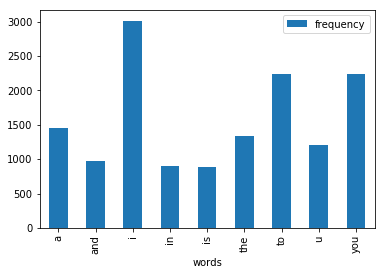

In [9]:
dffreq = pd.DataFrame(data = wordfreq(new_df['text']), columns = ['words', 'frequency'])
%matplotlib inline
#N не берём, так как это всего лишь замена различных чисел
dffreq[1:10].groupby('words').sum().plot.bar()

Наш топ-10 слов (без N):

In [10]:
wordfreq(new_df['text'])[1:11]

[('i', 3011),
 ('to', 2242),
 ('you', 2242),
 ('a', 1449),
 ('the', 1332),
 ('u', 1212),
 ('and', 979),
 ('in', 902),
 ('is', 890),
 ('me', 803)]

Слова в топ-10 - числа, служебные слова (предлоги, союзы, артикли), глаголы-связки и местоимения. Эти слова чрезвычайно частотны в любом типе текстов, так что пользы от их наличия в тексте при классификации на спам/не спам будет немного. 

<b>Задача 5. Функция предобработки и удаление стоп-слов.</b>  
Для удаления стоп-слов можно использовать модуль nltk. Импортируйте stopwords из nltk.corpus, далее, чтобы получить список английских стоп-слов, нужно сделать stopwords.words('english').
Перепишите функцию предобработки так, чтобы она на вход принимала список текстов и список стоп-слов, чистила текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.
Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь.
Постройте график частот встречаемости слов в тексте.
Распечатайте топ-10 слов и их частоты.
Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавте их в список стоп-слов и повторите процедуру.

In [11]:
stwrds = stopwords.words('english')

In [12]:
def normalize_clean(text, stoplist):
    lst2 = []
    lst3 = []
    for x in text:
        x = x.lower()
        x = re.sub(r'\d+', ' N ', x)
        words = re.findall('\w+', x)
        d = filter(lambda a: a not in stoplist, words)
        x = ' '.join(d)
        lst2.append(x)
    return lst2

In [13]:
normalize_clean(newdf['text'][:10], stwrds)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry N wkly comp win fa cup final tkts N st may N text fa N receive entry question std txt rate c apply N N',
 'u dun say early hor u c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling N week word back like fun still tb ok xxx std chgs send еј N N rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press N copy friends callertune',
 'winner valued network customer selected receivea еј N prize reward claim call N claim code kl N valid N hours',
 'mobile N months u r entitled update latest colour mobiles camera free call mobile update co free N']

In [14]:
def wordfreq(sample):
    words = []
    for x in sample:
        for w in x.split():
             words.append(w)
    mostfreq = Counter(words).most_common()
    return mostfreq

Длина нашего заново предобработанного списка:

In [15]:
print(len(wordfreq(normalize_clean(newdf['text'], stwrds))))

7630


Количество слов в нашем списке уменьшилось на 144 слова из стоп-списка.

Остаётся ещё достаточно много неинформативных слов, которые являются сокращениями от тех слов, которые уже находятся в стоп-листе: 'u', 'ur', 'im', 'r', 'dont', 'wat', 'cant', 'wont', 'n', 'dun'.

In [16]:
new_stwrds = ['u', 'ur', 'im', 'r', 'dont', 'wat', 'cant', 'wont', 'n', 'dun']

In [17]:
stwrds += new_stwrds

In [18]:
def normalize_clean_improved(text, stoplist):
    lst2 = []
    for x in text:
        x = x.lower()
        x = re.sub(r'\d+', ' N ', x)
        words = re.findall('\w+', x)
        d = filter(lambda a: a not in stoplist, words)
        x = ' '.join(d)
        lst2.append(x)
    return lst2

In [19]:
normalize_clean_improved(newdf['text'][:10], stwrds)

['go jurong point crazy available bugis great world la e buffet cine got amore',
 'ok lar joking wif oni',
 'free entry N wkly comp win fa cup final tkts N st may N text fa N receive entry question std txt rate c apply N N',
 'say early hor c already say',
 'nah think goes usf lives around though',
 'freemsg hey darling N week word back like fun still tb ok xxx std chgs send еј N N rcv',
 'even brother like speak treat like aids patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press N copy friends callertune',
 'winner valued network customer selected receivea еј N prize reward claim call N claim code kl N valid N hours',
 'mobile N months entitled update latest colour mobiles camera free call mobile update co free N']

In [20]:
wordfreqdict = wordfreq(normalize_clean_improved(newdf['text'], stwrds))

<b>Задача 6. Удаление низкочастотных слов</b>
По сформированому на предыдущем шаге словарю, посмотрите какой процент слов встречается больше одного раза. Нужны ли нам слова которые встретились только один раз?
Преобразуйте функцию предобработки таким образом, что бы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова.
Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними).
Сформируйте словарь. Каков размер словаря теперь?

In [21]:
wordfreqdict

[('N', 4554),
 ('call', 606),
 ('get', 397),
 ('gt', 318),
 ('lt', 316),
 ('еј', 303),
 ('ok', 292),
 ('free', 288),
 ('go', 286),
 ('know', 261),
 ('like', 245),
 ('good', 245),
 ('got', 240),
 ('day', 240),
 ('come', 230),
 ('time', 220),
 ('love', 209),
 ('send', 199),
 ('text', 195),
 ('want', 195),
 ('p', 186),
 ('txt', 184),
 ('one', 175),
 ('going', 173),
 ('need', 168),
 ('home', 167),
 ('stop', 163),
 ('lor', 162),
 ('k', 160),
 ('today', 160),
 ('sorry', 160),
 ('see', 158),
 ('still', 157),
 ('back', 153),
 ('da', 151),
 ('reply', 148),
 ('mobile', 144),
 ('take', 139),
 ('tell', 139),
 ('hi', 138),
 ('new', 136),
 ('later', 135),
 ('pls', 134),
 ('please', 133),
 ('think', 132),
 ('phone', 127),
 ('week', 126),
 ('c', 125),
 ('dear', 125),
 ('м_', 120),
 ('well', 118),
 ('much', 116),
 ('great', 115),
 ('night', 115),
 ('oh', 114),
 ('claim', 113),
 ('msg', 113),
 ('hope', 113),
 ('hey', 112),
 ('happy', 107),
 ('b', 106),
 ('yes', 103),
 ('way', 103),
 ('make', 102),
 ('gi

In [22]:
len(wordfreqdict)

7620

Исчезли ещё 10 слов нового стоп-листа.

In [23]:
dfd = wordfreq(normalize_clean_improved(newdf['text'], stwrds))
n = 0
for words,keys in dfd:
    if keys > 1:
        n += 1
length = len(wordfreq(normalize_clean_improved(newdf['text'], stwrds)))
#процент слов, встречающихся один раз
perc = 100*(1-n/length)

In [24]:
perc

50.28871391076115

Создадим новый стоплист, в который добавим слишком редкие слова:

In [25]:
newstopwords = []
for words,keys in wordfreqdict:
    if keys <= 1:
        newstopwords.append(words)
newstopwords
stwrds += newstopwords

Ранее я создавал новые датафреймы, чтобы не "портить" оригинальный, но в этот раз для выполнения задачи так я уже не смог сделать, поэтому заменил текст в датафрейме.

In [26]:
def normalize_clean_improved_twice(text, stoplist):     
    listofwords = []
    for x in text['text']:
        low = x.lower()
        subb = re.sub(r'\d+', ' N ', low)
        words = re.findall('\w+', subb)
        d = filter(lambda a: a not in stoplist, words)
        
        joined = ' '.join(d)
        text['text'] = text['text'].replace(x, joined)

    for ee in text['text']:
        for w in ee.split():
            listofwords.append(w)
    mostfreq = Counter(listofwords).most_common()

    return  mostfreq

In [27]:
normalize_clean_improved_twice(newdf, stwrds)

[('N', 3360),
 ('call', 606),
 ('get', 397),
 ('gt', 318),
 ('lt', 316),
 ('еј', 303),
 ('ok', 292),
 ('free', 288),
 ('go', 286),
 ('know', 261),
 ('like', 245),
 ('good', 245),
 ('got', 240),
 ('day', 240),
 ('come', 230),
 ('time', 220),
 ('love', 209),
 ('send', 199),
 ('text', 195),
 ('want', 195),
 ('p', 186),
 ('txt', 184),
 ('one', 175),
 ('going', 173),
 ('need', 168),
 ('home', 167),
 ('stop', 163),
 ('lor', 162),
 ('k', 160),
 ('today', 160),
 ('sorry', 160),
 ('see', 158),
 ('still', 157),
 ('back', 153),
 ('da', 151),
 ('reply', 148),
 ('mobile', 144),
 ('take', 139),
 ('tell', 139),
 ('hi', 138),
 ('new', 136),
 ('later', 135),
 ('pls', 134),
 ('please', 133),
 ('think', 132),
 ('phone', 127),
 ('week', 126),
 ('c', 125),
 ('dear', 125),
 ('м_', 120),
 ('well', 118),
 ('much', 116),
 ('great', 115),
 ('night', 115),
 ('oh', 114),
 ('claim', 113),
 ('msg', 113),
 ('hope', 113),
 ('hey', 112),
 ('happy', 107),
 ('b', 106),
 ('yes', 103),
 ('way', 103),
 ('make', 102),
 ('gi

In [28]:
newdf

,text,class
0,go point crazy available bugis great world la ...,0
1,ok lar joking wif oni,0
2,free entry wkly comp win fa cup final tkts st ...,1
3,say early hor c already say,0
4,nah think goes usf lives around though,0
5,freemsg hey darling N week word back like fun ...,1
6,even brother like speak treat like,0
7,per request melle melle oru minnaminunginte nu...,0
8,winner valued network customer selected receiv...,1
9,mobile months entitled update latest colour mo...,1


Удалилась примерно половина нашего частотного списка (как и показывали расчёты выше).

In [29]:
print(len(normalize_clean_improved_twice(newdf, stwrds)))

3787


<b>Задачи 7-8</b> я не очень понимаю как можно сделать, к сожалению. 

<b>Задача 9. Решение задачи классификации</b>
Теперь с помощью наших представлений и метода K ближайших соседей (KNN) научимся вычислять спам.
Пусть X -- вектора признаков (полученные с помощью CountVectorizer или TfidfVectorizer), y -- вектор ответов (в нашем случае колонка class в таблице).
Разделите (X, y) на обучающую выворку (X_train, y_train) (70%) и на тестовую -- (X_test, y_test) (30%). Разделить выборку можно вручную, но лучше воспользоваться train_test_split.
Далее обучите классификатор на (X_train, y_train) -- это делается с помощью метода fit. Затем получите y_pred (результат классификации) на тесте X_test с помощью метода predict. После чего сравните получившийся результат y_pred и y_test (правильные метки классов) с помощью функции accuracy_score.
Поиграйте с параметром n_neighbors у KNN -- добейтесь наилучшего результата классификации.
Сравните качество классификации для представлений

In [30]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, min_df=2,
                                   stop_words='english')
tovectorytext = tfidf_vectorizer.fit_transform(newdf['text'])
y =  newdf['class']

In [31]:
tovectorytext

<5572x3546 sparse matrix of type '<class 'numpy.float64'>'
	with 35844 stored elements in Compressed Sparse Row format>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tovectorytext, y, test_size=0.30)
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [33]:
prediction = neigh.predict(X_test)
accuracy_score(y_test, prediction)

0.95813397129186606

А теперь с простым векторайзером:

In [34]:
count_vectorizer = CountVectorizer(max_df=0.7, min_df=2,
                                   stop_words='english')
tovectorytext2 = count_vectorizer.fit_transform(newdf['text'])
y =  newdf['class']
X_train, X_test, y_train, y_test = train_test_split(tovectorytext2, y, test_size=0.30)
neigh2 = KNeighborsClassifier(n_neighbors=1)
neigh2.fit(X_train, y_train)
prediction2 = neigh2.predict(X_test)
accuracy_score(y_test, prediction2)

0.95633971291866027

Как видно, качество примерно одинаковое.